In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.utils import np_utils
from sklearn.utils import shuffle

/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
train = np.load('data/Train_LSTM.npy')
test = np.load('data/LSTM_labels.npy')

In [3]:
train.shape

(1955, 950, 13)

In [4]:
print(test)

[0 0 0 ... 5 5 5]


In [5]:
labels = np_utils.to_categorical(test,6)

In [6]:
labels.shape

(1955, 6)

In [7]:
X,y = shuffle(train,labels)

In [8]:
print(labels)

[[1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]]


In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 4)

In [10]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1564, 950, 13)
(391, 950, 13)
(1564, 6)
(391, 6)


In [23]:
model = Sequential()

In [24]:
model.add(LSTM((6),batch_input_shape=(None,950,13),return_sequences=False,activation=False))
model.add(Dense(6,activation='sigmoid'))

ValueError: ('Could not interpret activation function identifier:', False)

In [22]:
model.compile(loss='mean_absolute_error',optimizer = 'adam', metrics=['accuracy'])

model.summary()

In [16]:
history = model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test))

Train on 1564 samples, validate on 391 samples
Epoch 1/10
1564/1564 [==============================] - 20s 13ms/step - loss: 0.1721 - acc: 0.1701 - val_loss: 0.1720 - val_acc: 0.1611
Epoch 2/10
1564/1564 [==============================] - 19s 12ms/step - loss: 0.1717 - acc: 0.1701 - val_loss: 0.1716 - val_acc: 0.1611
Epoch 3/10
1564/1564 [==============================] - 19s 12ms/step - loss: 0.1714 - acc: 0.1701 - val_loss: 0.1713 - val_acc: 0.1611
Epoch 4/10
1564/1564 [==============================] - 18s 12ms/step - loss: 0.1711 - acc: 0.1701 - val_loss: 0.1710 - val_acc: 0.1611
Epoch 5/10
1564/1564 [==============================] - 19s 12ms/step - loss: 0.1708 - acc: 0.1701 - val_loss: 0.1708 - val_acc: 0.1611
Epoch 6/10
1564/1564 [==============================] - 18s 12ms/step - loss: 0.1706 - acc: 0.1701 - val_loss: 0.1705 - val_acc: 0.1611
Epoch 7/10
1564/1564 [==============================] - 19s 12ms/step - loss: 0.1704 - acc: 0.1701 - val_loss: 0.1703 - val_acc: 0.1611
E

In [ ]:
result = model.predict(X_test)

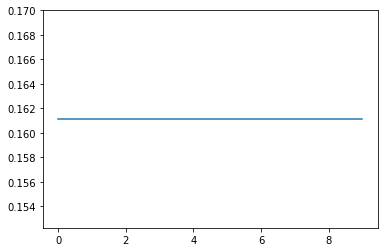

In [19]:
plt.plot(history.history['val_acc'])
plt.show()